In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/216?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))

for j in range(8):
    url = "https://icook.tw/categories/219?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 10435
Some examples: [('苜蓿芽', '番茄丁'), ('苜蓿芽', '牛頭牌咖哩炒醬'), ('苜蓿芽', '米血糕'), ('苜蓿芽', '沙茶醬'), ('苜蓿芽', '花生粉'), ('苜蓿芽', '蒜泥')]


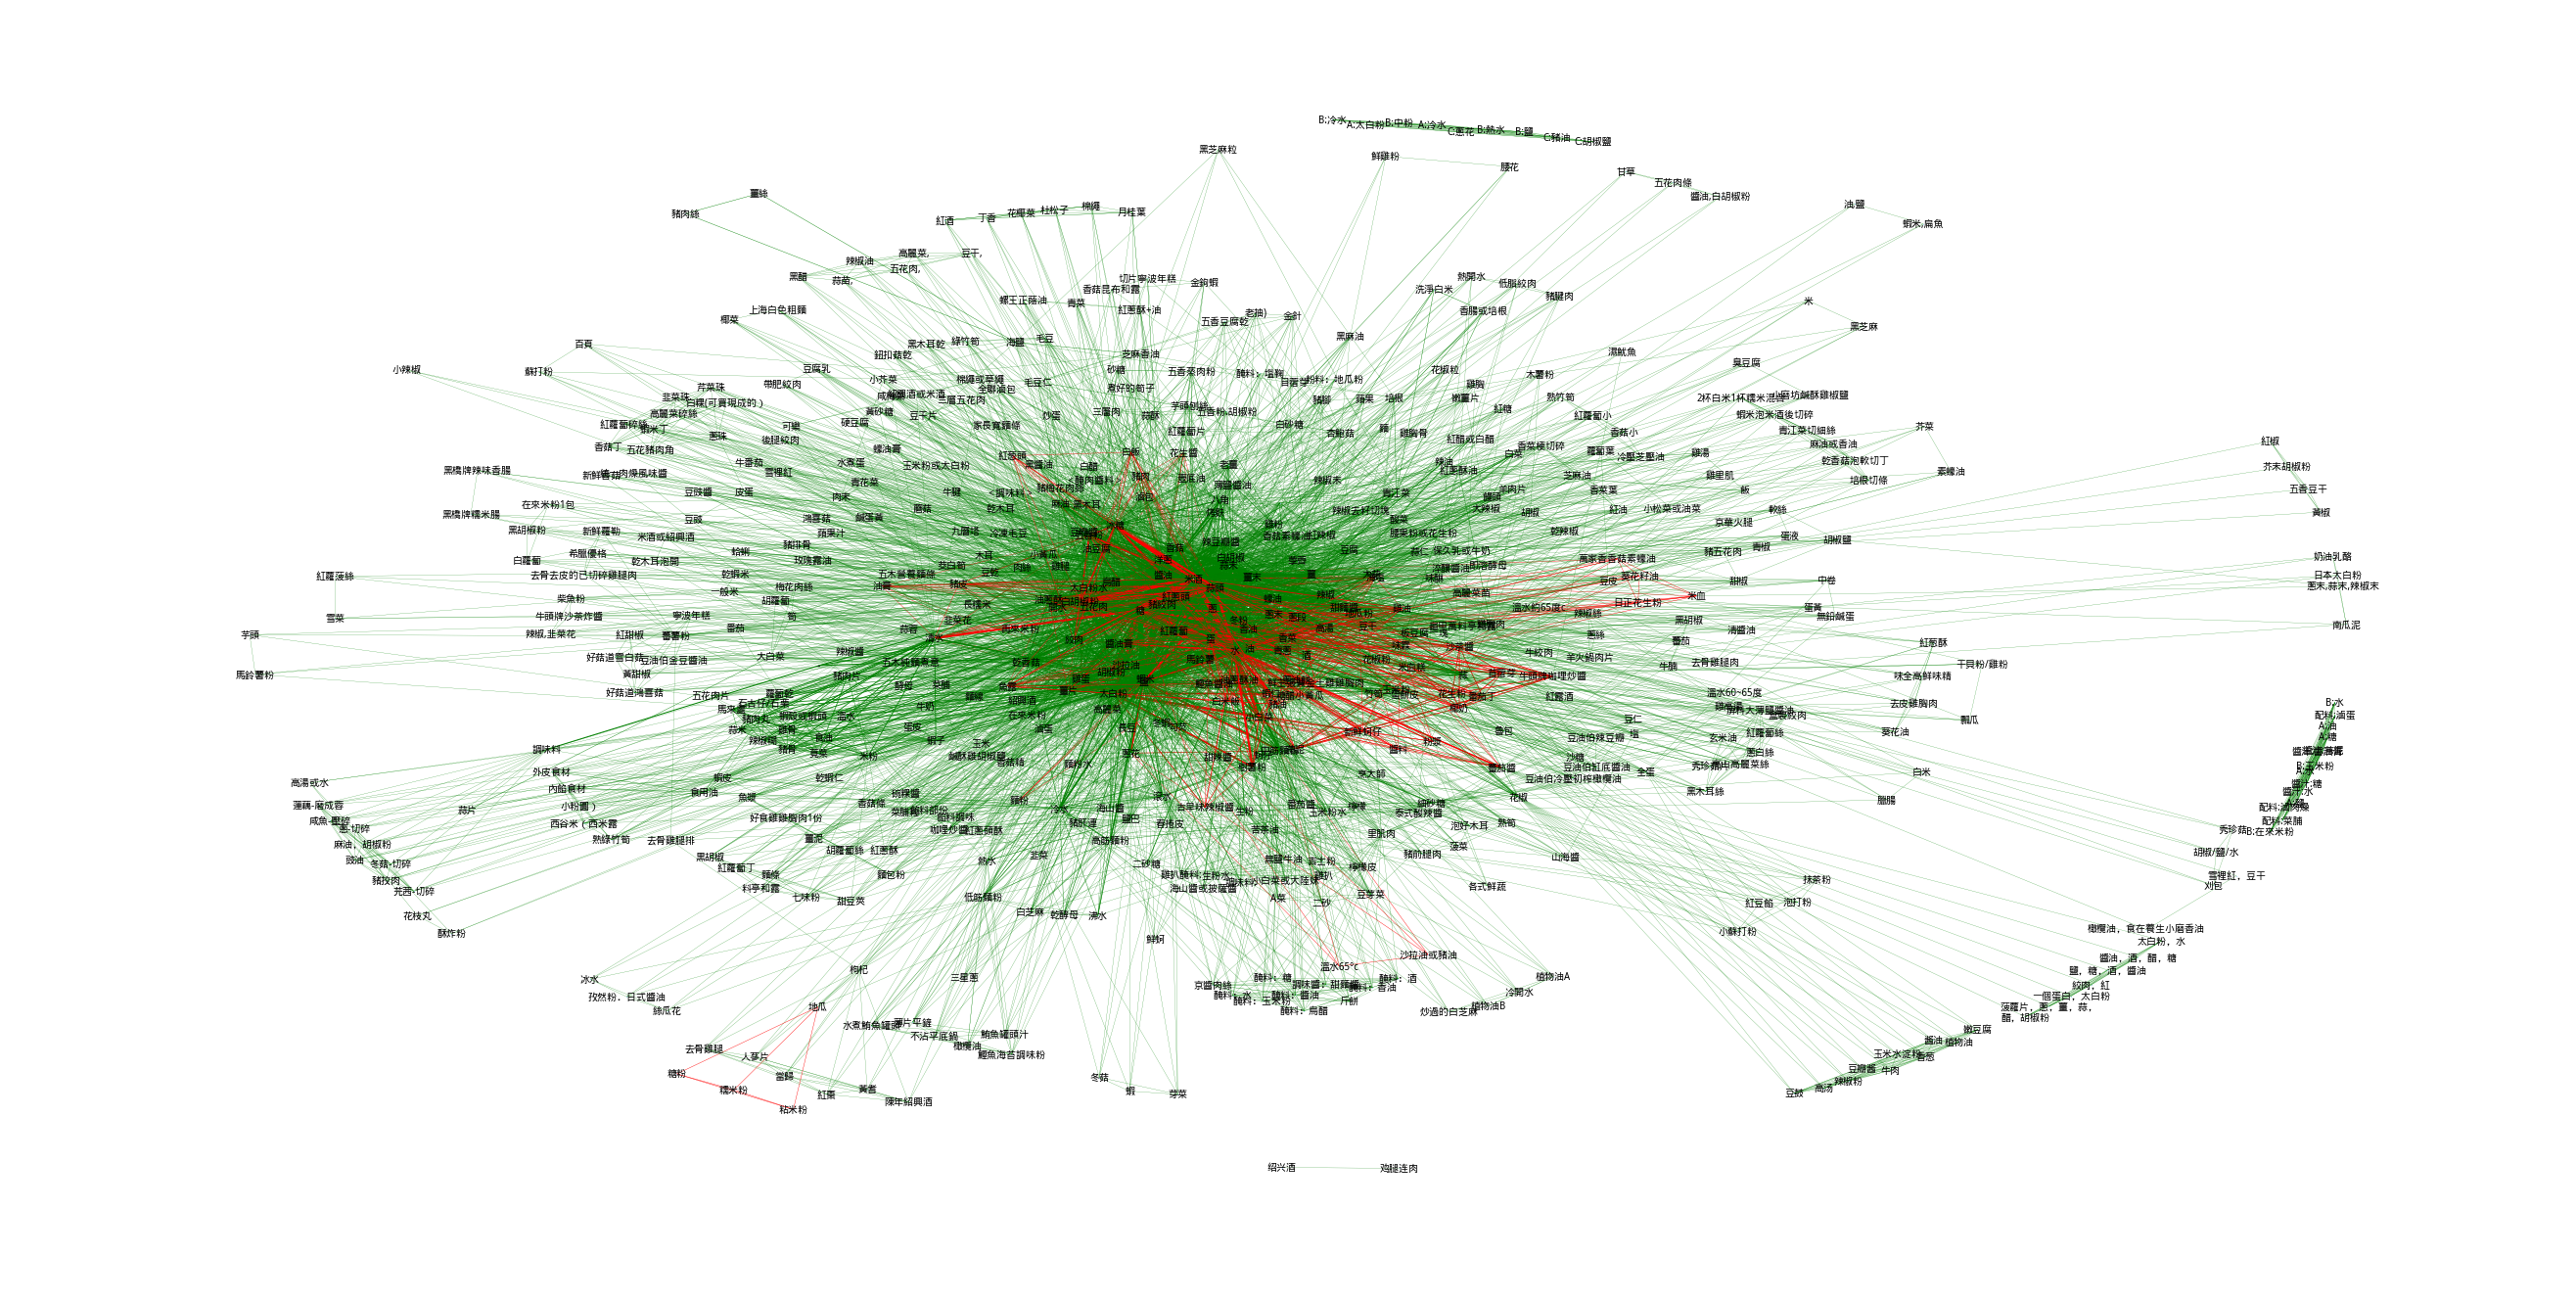

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result[:609]:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, color = 'b', weight = default_weight)
        
for nodes in result[610:]:
    n0 = nodes[0]
    n1 = nodes[1]
    if nodes in result[:609]:
        G[n0][n1]['color'] = 'r'
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
        else:
            G.add_edge(n0,n1, color = 'r', weight = default_weight)
    else:
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
        else:
            G.add_edge(n0,n1, color = 'g', weight = default_weight)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, node_color = BLUE, with_labels = True, edge_color=colors, width=weights, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('joint_tw_cn.png', dpi=100)

In [8]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('醬油', 301), ('鹽', 282), ('水', 234), ('米酒', 233), ('糖', 214), ('胡椒粉', 168), ('香油', 139), ('蒜頭', 139), ('蒜末', 136), ('蔥', 125), ('白胡椒粉', 123), ('雞蛋', 121), ('冰糖', 121), ('太白粉', 118), ('紅蘿蔔', 113)]

Closeness centrality: [('醬油', 0.6439273822736642), ('鹽', 0.6312721620440084), ('水', 0.590963658190549), ('米酒', 0.5903247785600727), ('糖', 0.5833872010342598), ('胡椒粉', 0.5521237817675099), ('香油', 0.5353435491843797), ('蒜末', 0.5337736267527539), ('蒜頭', 0.5322128851540616), ('蔥', 0.5275849470222872), ('白胡椒粉', 0.5255538211434718), ('雞蛋', 0.5250484809308339), ('太白粉', 0.5250484809308339), ('豬絞肉', 0.5180744024364964), ('紅蘿蔔', 0.5180744024364964)]

Degree centrality: [('醬油', 0.5058823529411764), ('鹽', 0.4739495798319328), ('水', 0.3932773109243698), ('米酒', 0.3915966386554622), ('糖', 0.3596638655462185), ('胡椒粉', 0.2823529411764706), ('香油', 0.23361344537815126), ('蒜頭', 0.23361344537815126), ('蒜末', 0.2285714285714286), ('蔥', 0.21008403361344538), ('白胡椒粉', 0.20672268907563027), ('雞蛋', 0.203361344

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 177310.0
Total edges in the graph: 6263
Density: 0.0353

Name: 
Type: Graph
Number of nodes: 596
Number of edges: 6263
Average degree:  21.0168


In [10]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 6779
[(('醬油', '糖'), 33), (('醬油', '米酒'), 33), (('米酒', '糖'), 21), (('醬油', '香油'), 21), (('蒜頭', '醬油'), 19), (('醬油', '水'), 19), (('太白粉', '水'), 19), (('豬絞肉', '醬油'), 17), (('水', '醬油'), 17), (('鹽', '糖'), 17), (('水', '鹽'), 16), (('醬油', '鹽'), 16), (('糖', '水'), 15), (('蒜末', '醬油'), 15), (('蛋', '水'), 15)]


In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

301


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.4721
